In [18]:
import pandas as pd

In [19]:
import numpy as np

In [20]:
df=pd.read_excel('timeseries.xls')
df.fillna(0, inplace=True)

df.index=pd.to_datetime(df.Date)
df.head()

,Date,Balance,funds rec,fund remittances,cred,deb
Date,,,,,,
2018-06-01,2018-06-01,162348.74,0,0,5,50
2018-06-02,2018-06-02,162331.04,0,0,5,50
2018-06-03,2018-06-03,162331.04,0,0,5,50
2018-06-04,2018-06-04,96452.04,0,0,5,50
2018-06-05,2018-06-05,396452.04,0,0,5,50


In [21]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-06-01 to 2019-05-31
Data columns (total 6 columns):
Date                365 non-null datetime64[ns]
Balance             365 non-null float64
funds rec           365 non-null int64
fund remittances    365 non-null int64
cred                365 non-null int64
deb                 365 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 20.0 KB


In [22]:
update1=df["funds rec"].std(axis=0)
update2=df["fund remittances"].std(axis=0)
update3=df["cred"].std(axis=0)
update4=df["deb"].std(axis=0)


In [23]:
from datetime import date
d0 = date(2019, 5, 31)
d1 = date(2019, 7, 1)
delta = d1 - d0
a=delta.days

In [24]:
y=range(a)

In [25]:
from xlutils.copy import copy    
from xlrd import open_workbook

In [26]:
book2 = open_workbook('timeseries.xls')  
book = copy(book2)  
sheet = book.get_sheet(0)

row=366

content = [update1,update2,update3,update4]
for x in y:
    column=2
    for item in content:
        sheet.write(row, column, item)
        column+=1
    row+=1    
    

    
    
book.save("series.xls")

In [27]:
df2=pd.read_excel('series.xls')

In [28]:
df2.head()


,Date,Balance,funds rec,fund remittances,cred,deb
0,2018-06-01,162348.74,0.0,0.0,5.0,50.0
1,2018-06-02,162331.04,0.0,0.0,5.0,50.0
2,2018-06-03,162331.04,0.0,0.0,5.0,50.0
3,2018-06-04,96452.04,0.0,0.0,5.0,50.0
4,2018-06-05,396452.04,0.0,0.0,5.0,50.0


In [29]:
test=df2[321:366]


In [31]:
test.head()

,Date,Balance,funds rec,fund remittances,cred,deb
321,2019-04-18,749502.02,0.0,0.0,12.0,70.0
322,2019-04-19,749502.02,0.0,0.0,12.0,70.0
323,2019-04-20,751404.02,1.0,0.0,12.0,70.0
324,2019-04-21,751404.02,0.0,0.0,12.0,70.0
325,2019-04-22,426955.02,0.0,1.0,12.0,70.0


In [32]:
df2.index=pd.to_datetime(df2.Date)
df=df2

In [33]:
df=df.drop(columns='Date')

In [34]:
df.tail()

,Balance,funds rec,fund remittances,cred,deb
Date,,,,,
2019-06-27,NaN,0.252937,0.309346,2.863916,24.378245
2019-06-28,NaN,0.252937,0.309346,2.863916,24.378245
2019-06-29,NaN,0.252937,0.309346,2.863916,24.378245
2019-06-30,NaN,0.252937,0.309346,2.863916,24.378245
2019-07-01,NaN,0.252937,0.309346,2.863916,24.378245


In [35]:
df.info()
train=df[:321]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 396 entries, 2018-06-01 to 2019-07-01
Data columns (total 5 columns):
Balance             365 non-null float64
funds rec           396 non-null float64
fund remittances    396 non-null float64
cred                396 non-null float64
deb                 396 non-null float64
dtypes: float64(5)
memory usage: 18.6 KB


In [36]:
df.plot(grid=True)

In [37]:
df2=df[:366].resample(rule='W').last()

In [38]:
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf

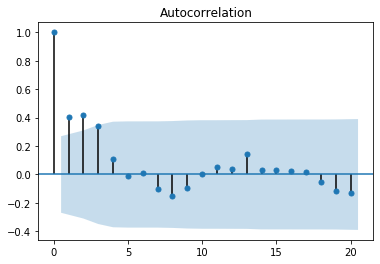

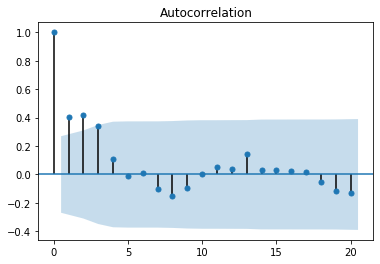

In [39]:
plot_acf(x=df2['Balance'],lags=20,alpha=0.05)

In [40]:
import matplotlib.pyplot as plt

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=5,
                              start_d=1,                              
                              start_q=0,
                              test="adf",
                              seasonal=False,
                              trace=True)
    return automodel

In [43]:
import pmdarima as pm

In [44]:
def plotarima(n_periods, timeseries, automodel):
    # Forecast
    fc, confint = automodel.predict(n_periods=n_periods, 
                                    return_conf_int=True)
    # Weekly index
    fc_ind = pd.date_range(timeseries.index[timeseries.shape[0]-1], 
                           periods=n_periods, freq="W")
    # Forecast series
    fc_series = pd.Series(fc, index=fc_ind)
    # Upper and lower confidence bounds
    lower_series = pd.Series(confint[:, 0], index=fc_ind)
    upper_series = pd.Series(confint[:, 1], index=fc_ind)
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries)
    plt.plot(fc_series, color="red")
    plt.xlabel("date")
    plt.ylabel(timeseries.name)
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color="k", 
                     alpha=0.25)
    plt.legend(("past", "forecast", "95% confidence interval"),  
               loc="upper left")
    plt.show()

Fit ARIMA: order=(5, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=8862.684, BIC=8889.084, Fit time=1.275 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=9146.503, BIC=9154.046, Fit time=0.041 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=8860.351, BIC=8871.665, Fit time=0.041 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=8984.516, BIC=8995.830, Fit time=0.108 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=9264.759, BIC=9268.530, Fit time=0.015 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=8862.310, BIC=8877.396, Fit time=0.106 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=8862.307, BIC=8877.393, Fit time=0.092 seconds


C:\Users\EESHITA\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\EESHITA\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=8864.065, BIC=8882.923, Fit time=0.518 seconds
Total fit time: 2.229 seconds


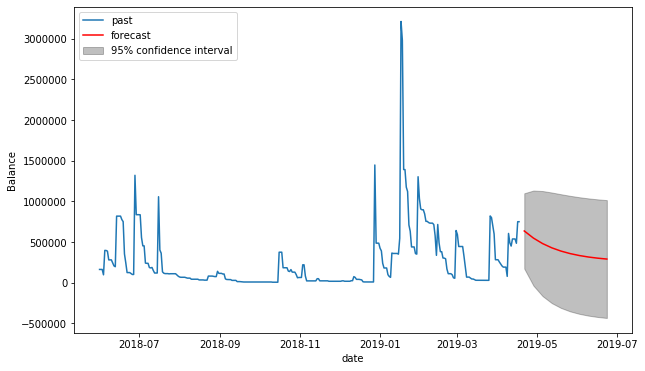

In [45]:
automodel = arimamodel(train["Balance"])
plotarima(10, train["Balance"], automodel)

C:\Users\EESHITA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\EESHITA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


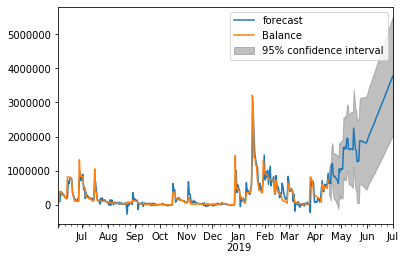

In [47]:
 #Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast interest rates using an AR(1) model
mod = ARIMA(df[:320][["Balance"]], order=(35,1,0),exog=df[:320][["funds rec","fund remittances","cred","deb"]])
res = mod.fit()


# Plot the original series and the forecasted series
res.plot_predict(start=2,end='2019-07-01',exog=df[320:][["funds rec","fund remittances","cred","deb"]])
plt.legend(fontsize=10)
plt.show()

In [48]:
#res.plot_predict?

In [49]:
history=[x for x in train]
pred=list()


model = ARIMA(train[["Balance"]], order=(5,1,0),)
model_fit = model.fit(disp=0)
output = model_fit.forecast()
    
yhat = output[0]
pred.append(yhat)
    
    
    
   



C:\Users\EESHITA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\EESHITA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [50]:
test=test.drop(columns='Date')

In [56]:
test=test.drop(columns='cred')
test=test.drop(columns='deb')
test=test.drop(columns='funds rec')
test=test.drop(columns='fund remittances')

In [57]:
a=test.to_numpy()

In [58]:
a

array([[ 749502.02],
       [ 749502.02],
       [ 751404.02],
       [ 751404.02],
       [ 426955.02],
       [ 426907.82],
       [ 370094.82],
       [ 328954.82],
       [ 325998.82],
       [ 325998.82],
       [ 325998.82],
       [ 312782.82],
       [ 222390.41],
       [ 222390.41],
       [ 212899.51],
       [ 192399.51],
       [ 189354.51],
       [ 189354.51],
       [ 189354.51],
       [ 181354.51],
       [ 833083.51],
       [ 629543.51],
       [ 346243.51],
       [ 346243.51],
       [ 346243.51],
       [ 293326.51],
       [ 292092.51],
       [ 252292.51],
       [1629293.51],
       [ 937138.87],
       [ 682074.87],
       [ 682074.87],
       [ 539974.87],
       [ 531024.87],
       [ 531024.87],
       [ 489624.87],
       [ 489624.87],
       [ 489624.87],
       [ 489624.87],
       [ 433696.87],
       [ 425588.87],
       [ 400588.87],
       [ 400588.87],
       [ 385720.87],
       [       nan]])

In [59]:
from sklearn import preprocessing

In [60]:
Abs_Scaler = preprocessing.MaxAbsScaler()
a = Abs_Scaler.fit_transform(a)
pred = Abs_Scaler.fit_transform(pred)


In [63]:
error = mean_squared_error(a[0], pred)
print('%.3f' % error)

0.292


In [ ]:
res.summary()